In [50]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score,roc_curve, auc
seed=42

In [34]:
df=pd.read_csv('features_flight_heli.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fname        6865 non-null   object 
 1   alt_max      6865 non-null   float64
 2   vert_acc     6865 non-null   float64
 3   horiz_speed  6865 non-null   float64
 4   dist         6865 non-null   float64
 5   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 321.9+ KB


In [4]:
df.drop(['fname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt_max      6865 non-null   float64
 1   vert_acc     6865 non-null   float64
 2   horiz_speed  6865 non-null   float64
 3   dist         6865 non-null   float64
 4   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 268.3 KB


In [7]:

Y = df['is_maneuver']
X = df.drop(['is_maneuver'], axis=1)

print(X.shape)
print(Y.shape)

(6865, 4)
(6865,)


In [8]:
df['is_maneuver'].value_counts()

1    5104
0    1761
Name: is_maneuver, dtype: int64

In [9]:
class_counts = df['is_maneuver'].value_counts()
target_count = class_counts.min()
df = df.groupby('is_maneuver').apply(lambda group: group.sample(target_count))

print("Balanced class distribution:")
print(df['is_maneuver'].value_counts())

Balanced class distribution:
0    1761
1    1761
Name: is_maneuver, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=seed)

In [35]:
X_train = np.array(X_train)
X_test=np.array(X_test)


In [40]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [86]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               1280      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 45,057
Trainable params: 45,057
Non-trai

In [87]:

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [88]:
#es = EarlyStopping(monitor='val_accuracy',mode='max', patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/100
138/138 [==============================] - 2s 5ms/step - loss: 0.4041 - accuracy: 0.8602 - val_loss: 0.3785 - val_accuracy: 0.8626
Epoch 2/100
138/138 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8673 - val_loss: 0.3731 - val_accuracy: 0.8617
Epoch 3/100
138/138 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8680 - val_loss: 0.3779 - val_accuracy: 0.8526
Epoch 4/100
138/138 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8636 - val_loss: 0.3701 - val_accuracy: 0.8517
Epoch 5/100
138/138 [==============================] - 0s 4ms/step - loss: 0.3347 - accuracy: 0.8682 - val_loss: 0.3645 - val_accuracy: 0.8544
Epoch 6/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8700 - val_loss: 0.3625 - val_accuracy: 0.8562
Epoch 7/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8675 - val_loss: 0.3602 - val_accuracy: 0.8581

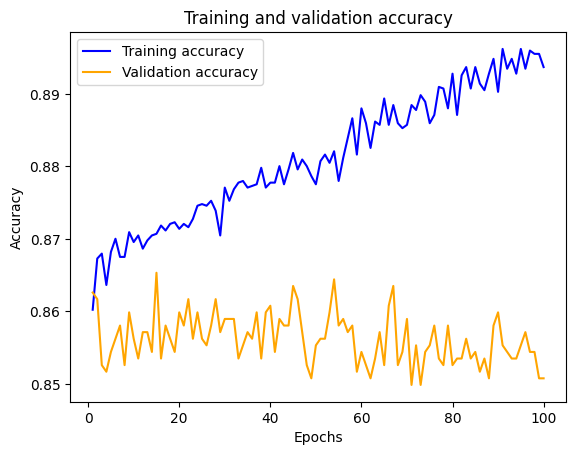

0.8961985111236572

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


np.max(acc)

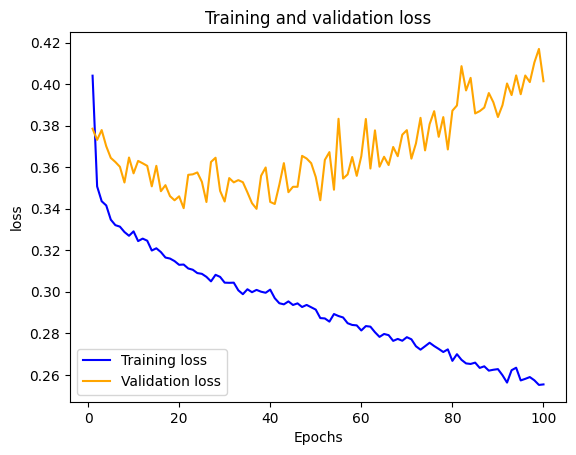

0.4040602147579193

In [90]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


np.max(loss)


In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

43/43 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8602
Test Loss: 0.3491
Test Accuracy: 0.8602


In [92]:

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

43/43 [==============================] - 0s 1ms/step


In [93]:
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)


Test Precision: 0.9012584704743466
Test Recall: 0.9118511263467189
Test F1 Score: 0.9065238558909445


In [97]:
fpr, tpr, threshold= roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
roc_metrics = pd.DataFrame(fpr, columns=['fpr'])
roc_metrics['tpr'] = tpr

roc_metrics.to_csv('./sequential_metrics/sequential_roc.csv')


AUC: 0.9013222331047992


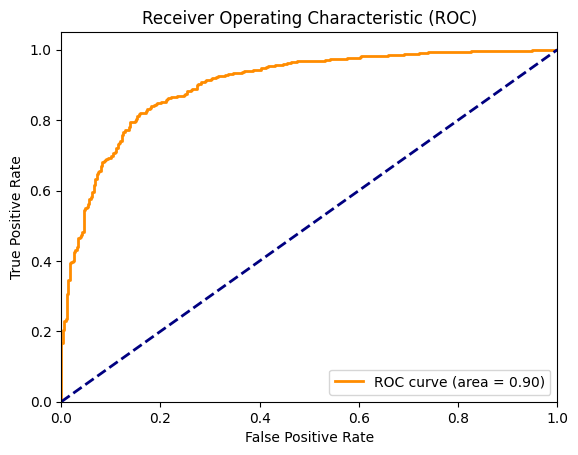

In [98]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [99]:
sequential_metrics = pd.DataFrame(history.history)

In [100]:
if not os.path.exists('./sequential_metrics'):
    os.makedirs('./sequential_metrics')


In [101]:
sequential_metrics.to_csv('./sequential_metrics/sequential_lda.csv', index=False)